<a href="https://colab.research.google.com/github/NeelayS/Predicting-COVID-19-from-X-Rays/blob/master/CNN_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
import os

In [0]:
from fastai.vision import *
from fastai.utils.mem import *
from fastai.callbacks.hooks import *

In [0]:
!unzip -uq '/content/drive/My Drive/Projects/COVID-19/covid-19.zip' -d '/content/drive/My Drive/Projects/COVID-19/data'

In [0]:
data_path = Path('/content/drive/My Drive/Projects/COVID-19/data/dataset')

In [0]:
classes = ['covid','normal']

In [39]:
for c in classes:
  print(c)
  verify_images(data_path/c)

covid


normal


In [0]:
batch = 8
data = ImageDataBunch.from_folder(
       data_path,train = ".", valid_pct = 0.4,
       ds_tfms = get_transforms(),size = 224,seed = 42,bs=batch).normalize(imagenet_stats)

In [41]:
data.classes,data.c

(['covid', 'normal'], 2)

In [52]:
len(data.train_ds),len(data.valid_ds)

(30, 20)

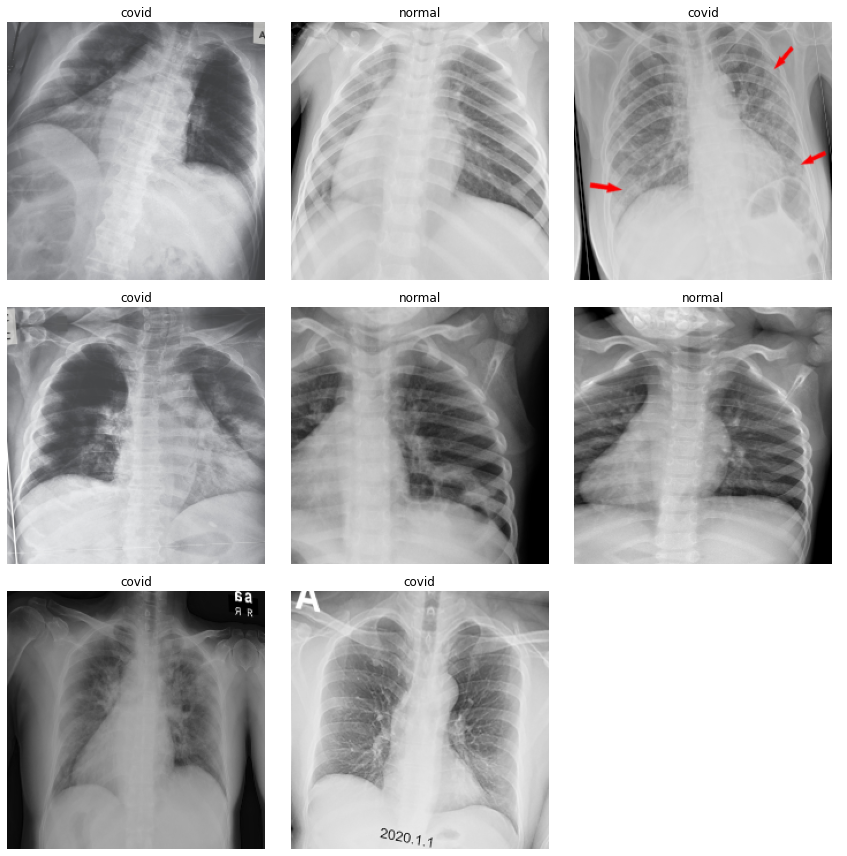

In [51]:
data.show_batch(rows= 3,size=(7,6))

In [0]:
learn = cnn_learner(data,models.resnet50,metrics=accuracy)

In [0]:
epochs = 10

In [55]:
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,accuracy,time
0,0.926185,0.703453,0.650000,00:21
1,0.658702,0.599173,0.850000,00:21
2,0.497250,0.205819,0.900000,00:21
3,0.440687,0.404335,0.800000,00:21
4,0.397733,0.539303,0.800000,00:21
5,0.335115,0.697845,0.800000,00:20
6,0.325457,0.659185,0.850000,00:21
7,0.359393,0.593535,0.800000,00:20
8,0.352986,0.568911,0.850000,00:20
9,0.364681,0.461241,0.850000,00:20


In [0]:
learn.unfreeze()

In [61]:
learn.lr_find(start_lr = 1e-5, end_lr = 1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


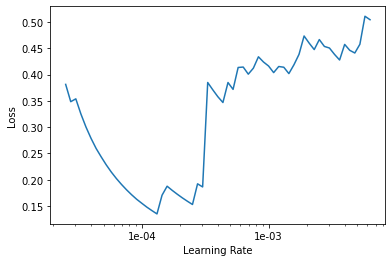

In [62]:
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(epochs,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.032967,0.392376,0.900000,00:25
1,0.200461,0.272305,0.900000,00:25
2,0.212444,0.184935,0.950000,00:25
3,0.158243,0.247047,0.950000,00:26
4,0.122694,0.238279,0.950000,00:26
5,0.110581,0.107841,0.950000,00:25
6,0.125932,0.154860,0.950000,00:25
7,0.125954,0.042031,0.950000,00:25
8,0.110822,0.025482,1.000000,00:26
9,0.118127,0.008226,1.000000,00:26


In [0]:
 learn.save('model')

In [0]:
learn.export()